In [1]:
# Images in dir - Dataset/test , Dataset/train
# Labels in Dataset/train.csv (There are no labels for test images)
# Visulaize the data, and do some basic Stats 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
import random

In [2]:
TRAIN_DIR = 'Dataset/train/'
TEST_DIR = 'Dataset/test/'
TRAIN_LABELS = 'Dataset/train.csv'

In [3]:
train_df = pd.read_csv(TRAIN_LABELS)
train_df.head()

,file_name,label
0,Image_train_00001.jpg,0
1,Image_train_00002.jpg,1
2,Image_train_00003.jpg,0
3,Image_train_00004.jpg,0
4,Image_train_00005.jpg,0


In [4]:
# Check for missing values
train_df.isnull().sum()

file_name    0
label        0
dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

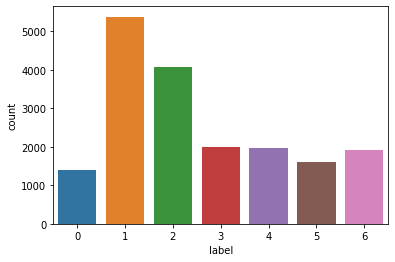

In [5]:
# Check for class imbalance (The classes are labeled from 0 to 6, column label)
sns.countplot(x='label', data=train_df)

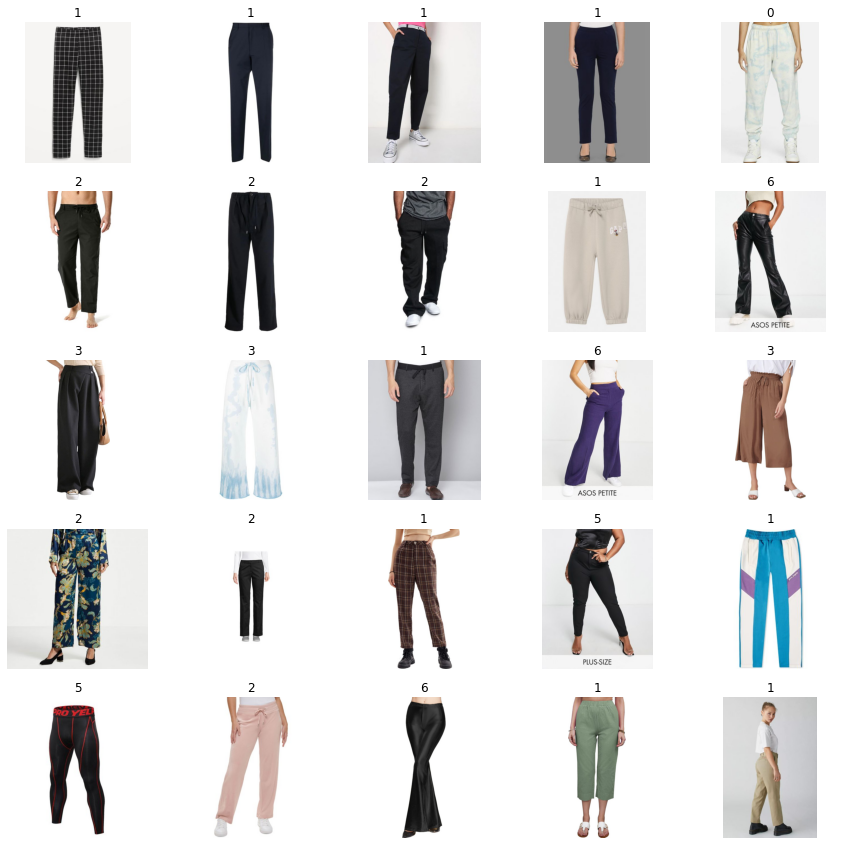

In [6]:
# Visualize the data
# Plot 25 random images from the training set
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        l = random.randint(0, len(train_df))
        img = mpimg.imread(TRAIN_DIR + train_df['file_name'][l])
        ax[i, j].imshow(img)
        ax[i, j].set_title(train_df['label'][l])
        ax[i, j].axis('off')

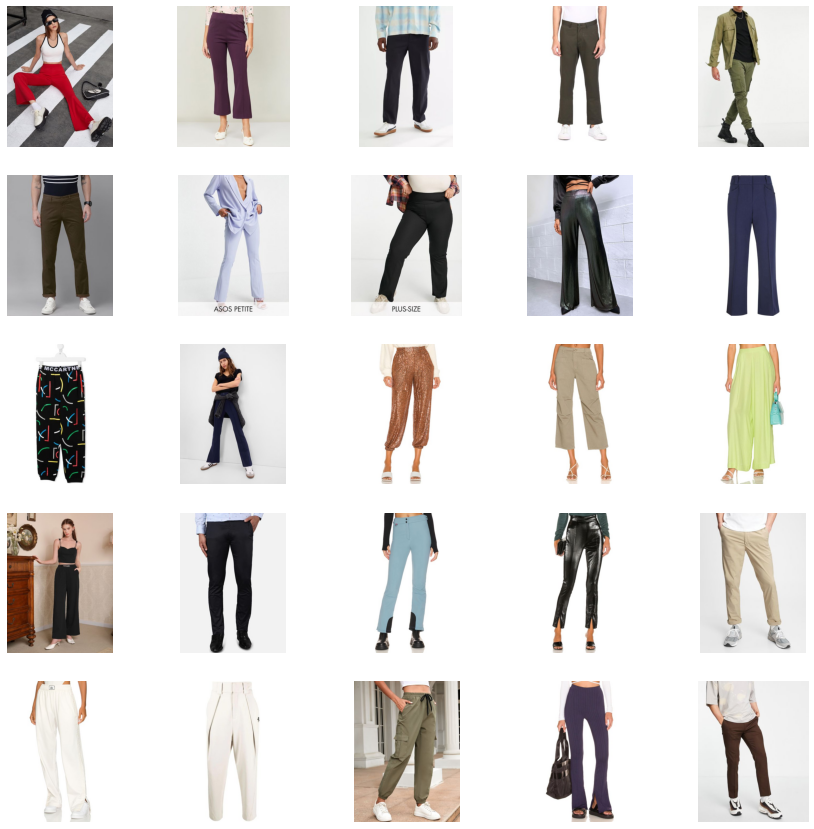

In [7]:
# Plot 25 random images from the test set
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        l = random.randint(0, len(os.listdir(TEST_DIR)))
        img = mpimg.imread(TEST_DIR + os.listdir(TEST_DIR)[l])
        ax[i, j].imshow(img)
        ax[i, j].axis('off')

## Applying Preprocessing to the data, getting to class imbalance right

<AxesSubplot: xlabel='label', ylabel='count'>

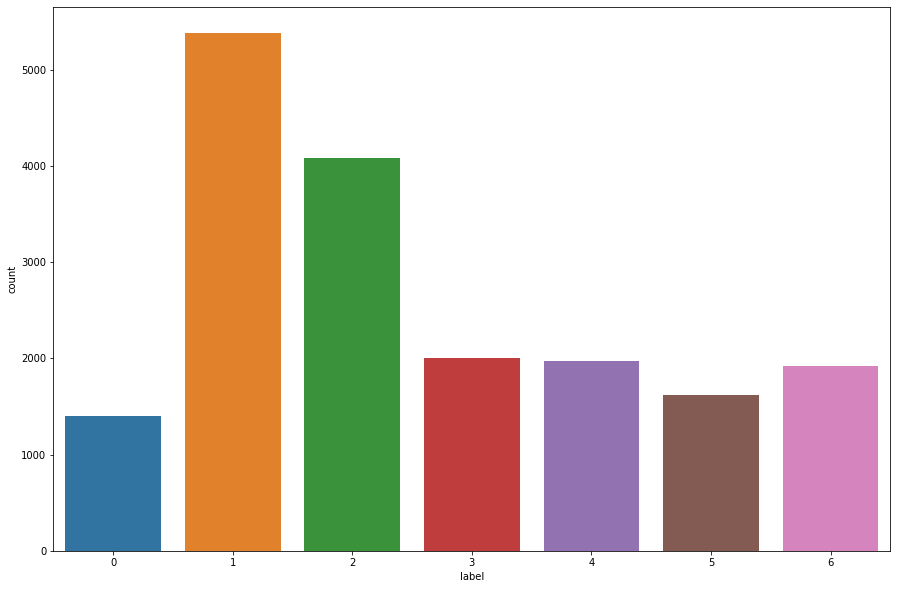

In [8]:
# Plot distribuion of labels for class imbalance, big image

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='label', data=train_df)

In [9]:
# Print the count
print(train_df['label'].value_counts())

1    5384
2    4084
3    2008
4    1972
6    1925
5    1616
0    1402
Name: label, dtype: int64


In [10]:
# Apply augmentation to the images, make class balance with +/- 10% of the max class

In [19]:
import albumentations as A

# Define the augmentation
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.Blur(p=0.2)
    
])

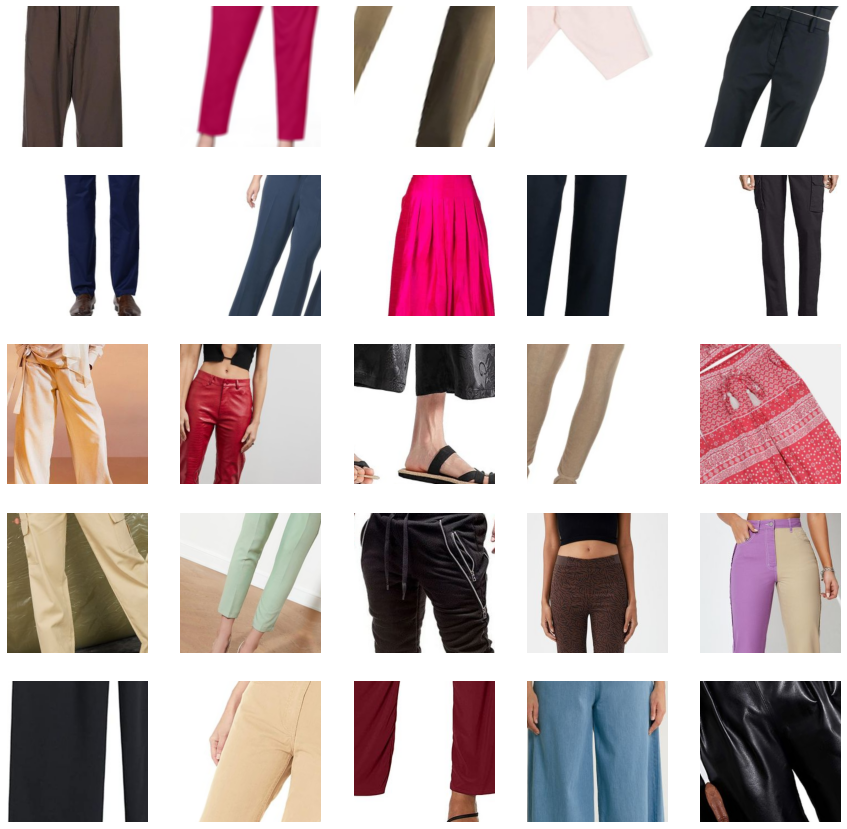

In [20]:
# Plot the augmented images
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        l = random.randint(0, len(train_df))
        img = mpimg.imread(TRAIN_DIR + train_df['file_name'][l])
        img = transform(image=img)['image']
        ax[i, j].imshow(img)
        ax[i, j].axis('off')

In [18]:
# Augment the low class data, and put them in new folder - Make sure class imblance is less than 20%
# Create a new folder for augmented images
os.mkdir('Dataset/augmented_images')


FileExistsError: [Errno 17] File exists: 'Dataset/augmented_images'

In [21]:

"""

1    5384
2    4084
3    2008
4    1972
6    1925
5    1616
0    1402

"""

# Above are the class counts, we will augment class. Need to augment 0,3,4,5,6 to get to 3500 to 4000 images

'\n\n1    5384\n2    4084\n3    2008\n4    1972\n6    1925\n5    1616\n0    1402\n\n'